10.0%. Run time:   1.43s. Est. time left: 00:00:00:12
20.0%. Run time:   2.90s. Est. time left: 00:00:00:11
30.0%. Run time:   4.44s. Est. time left: 00:00:00:10
40.0%. Run time:   6.02s. Est. time left: 00:00:00:09
50.0%. Run time:   7.71s. Est. time left: 00:00:00:07
60.0%. Run time:   9.33s. Est. time left: 00:00:00:06
70.0%. Run time:  10.86s. Est. time left: 00:00:00:04
80.0%. Run time:  12.38s. Est. time left: 00:00:00:03
90.0%. Run time:  13.96s. Est. time left: 00:00:00:01
100.0%. Run time:  15.48s. Est. time left: 00:00:00:00
Total run time:  15.65s


<IPython.core.display.Javascript object>


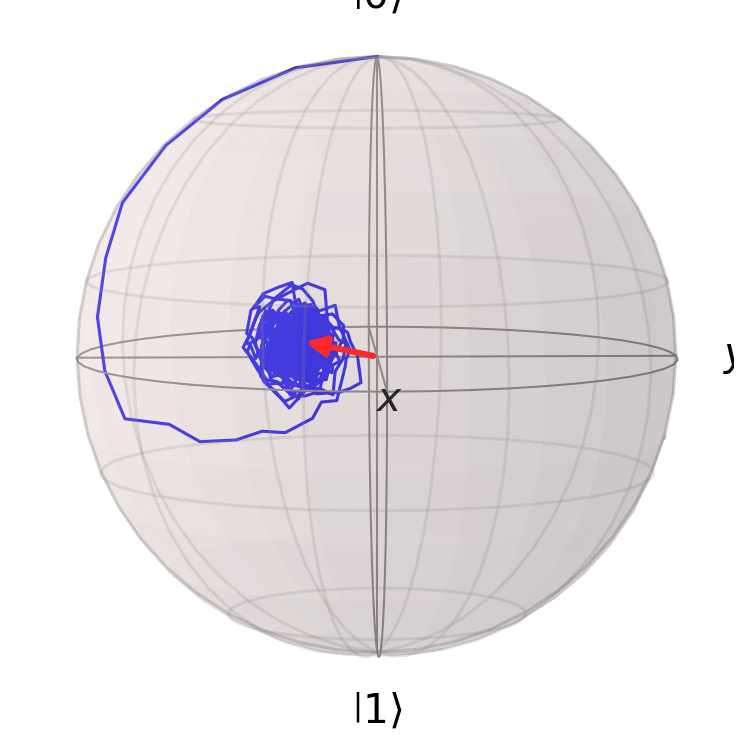

<IPython.core.display.Javascript object>


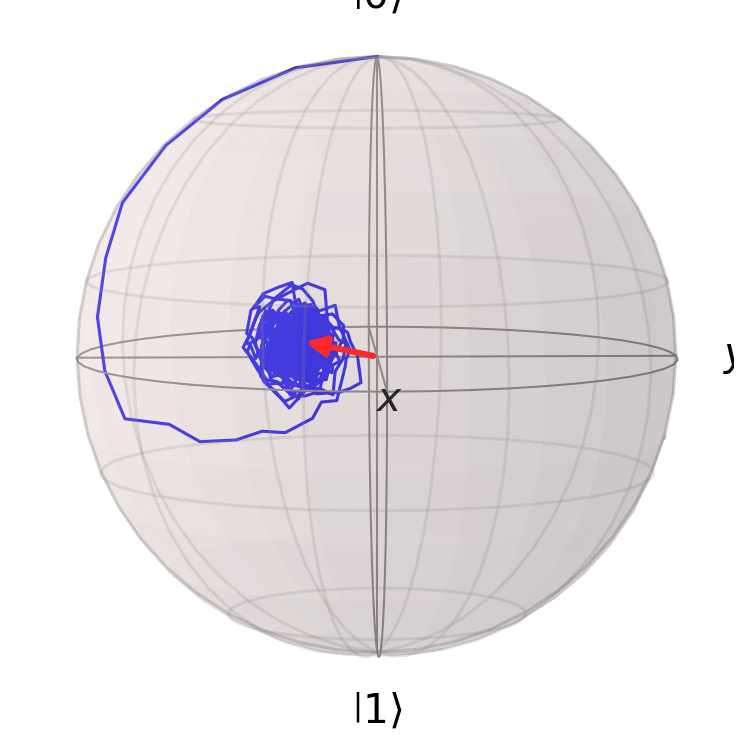

In [18]:
# Activa el modo interactivo en Jupyter Notebook
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, mcsolve, Bloch, sigmax, sigmay, sigmaz, Options, expect

# Definimos los estados base y excitado para un sistema de dos niveles
Kg = basis(2, 0)  # estado base |g⟩
Ke = basis(2, 1)  # estado excitado |e⟩

# Estado inicial en |g⟩
psi0 = Kg

# Parámetros del sistema
Omega = 3.5     # Frecuencia de Rabi
g = 1         # Tasa de emisión espontánea

# Hamiltoniano de Rabi
H = 0.5 * Omega * (Ke * Kg.dag() + Kg * Ke.dag())

# Operador de colapso: emisión espontánea de |e⟩ a |g⟩
Ceg = np.sqrt(g) * Kg * Ke.dag()
collapse = [Ceg]

# Tiempo de simulación y lista de tiempo
tlist = np.linspace(0, 80, 1000)

# Solución de Monte Carlo con varias trayectorias
n_traj = 100
opts = Options(store_states=True)
MC1 = mcsolve(H, psi0, tlist, c_ops=collapse, ntraj=n_traj, options=opts)

# Calculamos las matrices de Pauli
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Inicializamos listas para almacenar los valores de expectación
ex = []
ey = []
ez = []

# Calculamos los valores de expectación para cada trayectoria
for traj in MC1.states:
    ex_traj = expect(sx, traj)
    ey_traj = expect(sy, traj)
    ez_traj = expect(sz, traj)
    ex.append(ex_traj)
    ey.append(ey_traj)
    ez.append(ez_traj)

# Convertimos las listas en arrays de NumPy para facilitar el cálculo promedio
ex = np.array(ex)
ey = np.array(ey)
ez = np.array(ez)

# Verificamos la dimensión de las trayectorias para calcular el promedio
if ex.ndim > 1:
    # Calculamos el valor promedio en cada instante de tiempo
    ex_avg = np.mean(ex, axis=0)
    ey_avg = np.mean(ey, axis=0)
    ez_avg = np.mean(ez, axis=0)
else:
    ex_avg, ey_avg, ez_avg = ex, ey, ez  # Si solo hay una trayectoria, usamos directamente los valores

# Creamos una esfera de Bloch
b = Bloch()
b.point_color = ['b']
b.vector_color = ['r']

# Agregamos la trayectoria promedio a la esfera de Bloch
b.add_points([ex_avg, ey_avg, ez_avg], meth='l')
b.add_vectors([ex_avg[-1], ey_avg[-1], ez_avg[-1]])  # Estado final como vector

# Mostramos la esfera de Bloch
b.show()


20.0%. Run time:   0.00s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.05s. Est. time left: 00:00:00:00
80.0%. Run time:   0.07s. Est. time left: 00:00:00:00
100.0%. Run time:   0.09s. Est. time left: 00:00:00:00
Total run time:   0.11s


<IPython.core.display.Javascript object>


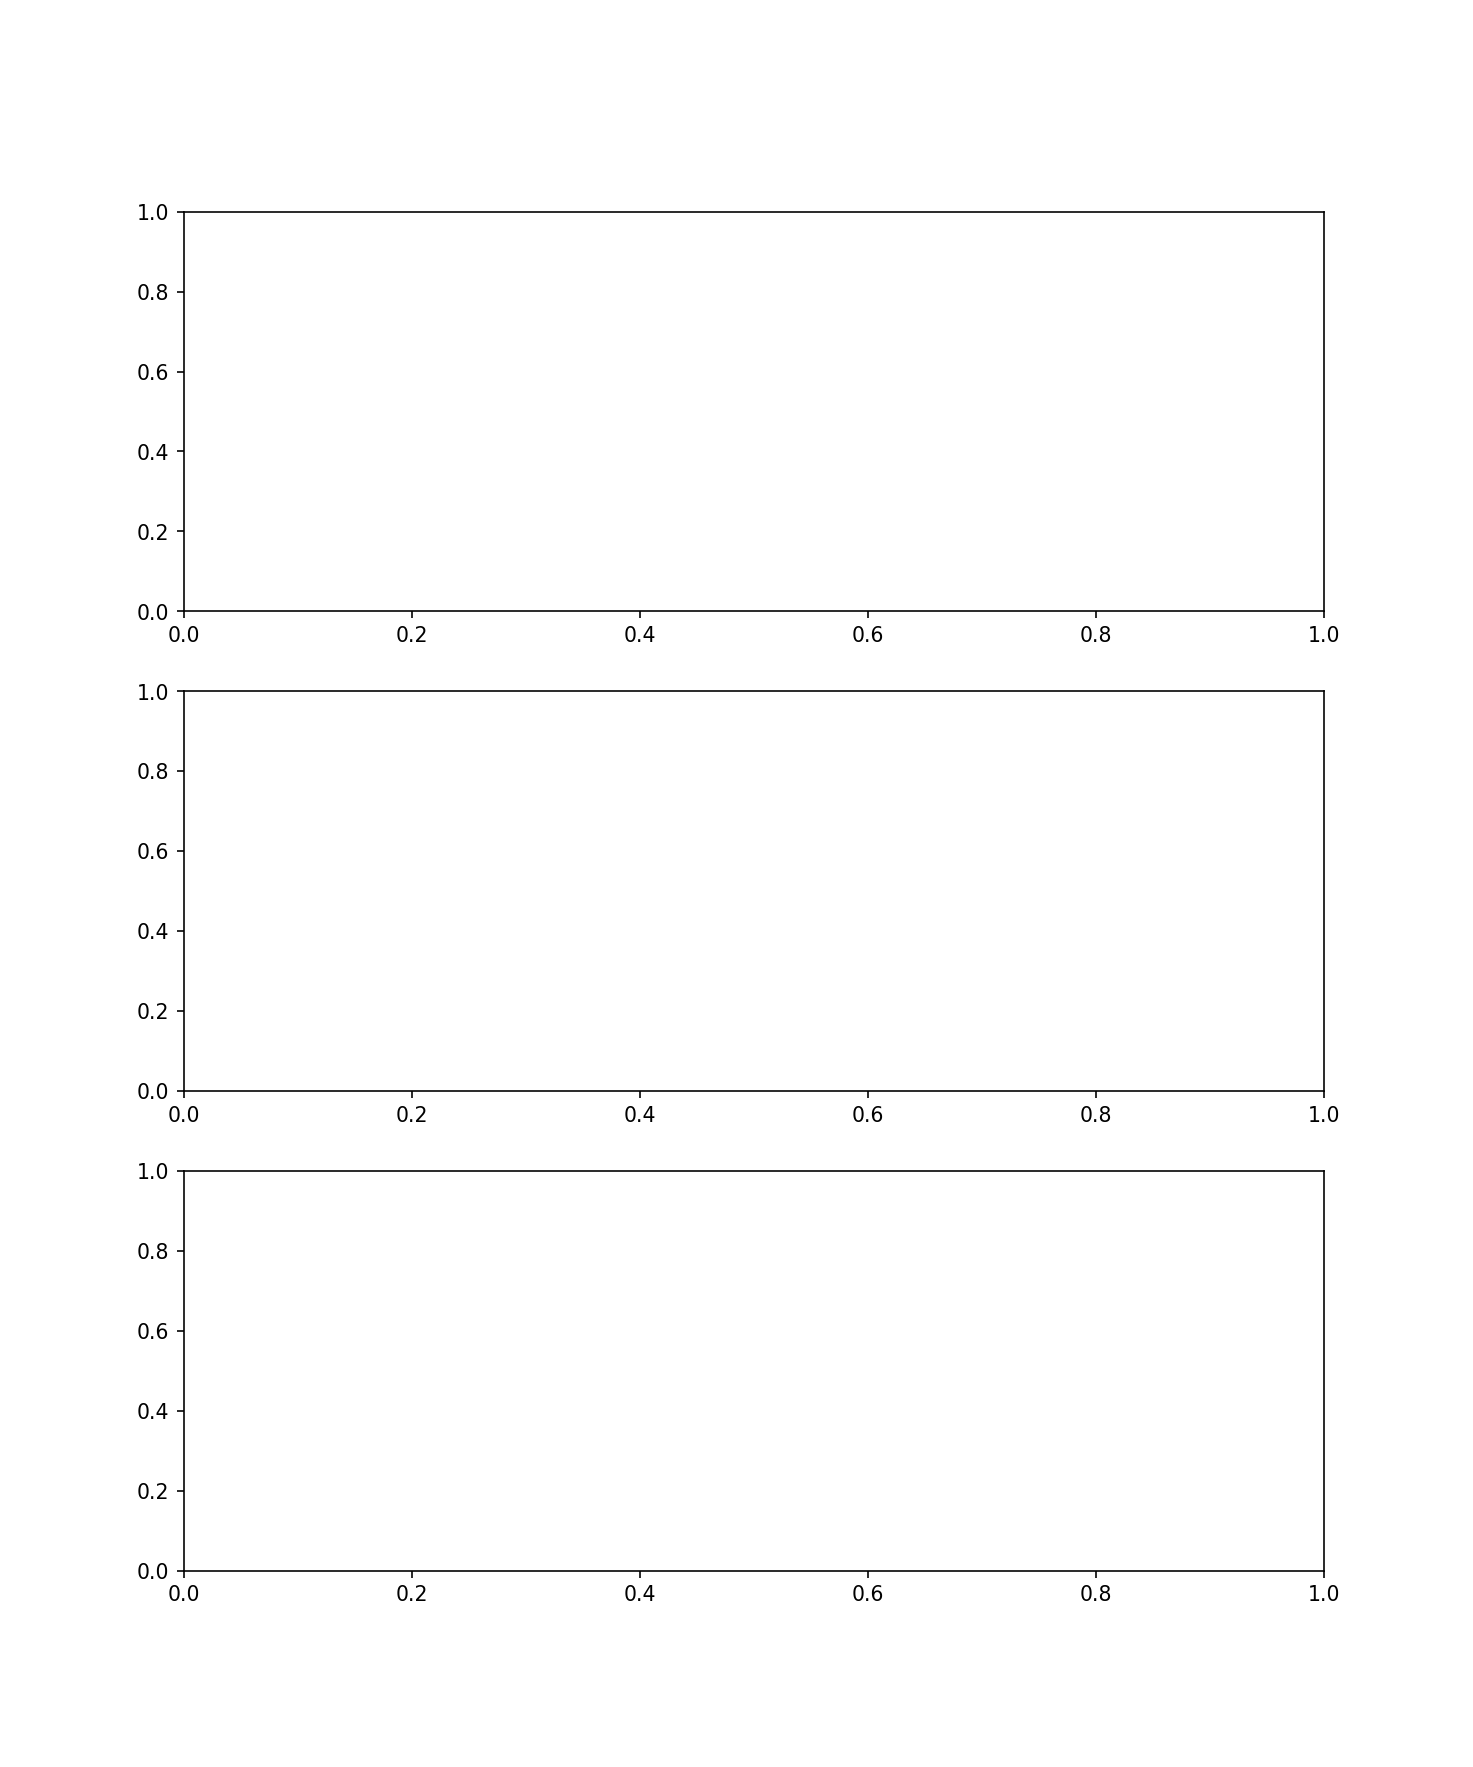

AttributeError: 'numpy.complex128' object has no attribute 'isherm'

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, sigmax, sigmay, sigmaz
from qutip import mcsolve, expect

# Definimos los estados base y excitado
Kg = basis(2, 0)  # estado base |g⟩
Ke = basis(2, 1)  # estado excitado |e⟩

# Estado inicial en |g⟩
psi0 = Kg

# Parámetros del sistema
Omega = 1     # Frecuencia de Rabi
g = 1         # Tasa de emisión espontánea

# Hamiltoniano de Rabi y operadores de colapso
H = 0.5 * Omega * (Ke @ Kg.dag() + Kg @ Ke.dag())
Ceg = np.sqrt(g) * Kg @ Ke.dag()
collapse = [Ceg]

# Tiempo de simulación
tlist = np.linspace(0, 10, 200)
n_traj = 5  # Número de trayectorias

# Simulación de Monte Carlo
MC = mcsolve(H, psi0, tlist, c_ops=collapse, ntraj=n_traj, options={"store_states": True})

# Preparación de las gráficas
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Variables para las gráficas
sx, sy, sz = sigmax(), sigmay(), sigmaz()
for traj in MC.states:
    # Expectación de las matrices de Pauli
    ex = [expect(sx, state) for state in traj]
    ey = [expect(sy, state) for state in traj]
    ez = [expect(sz, state) for state in traj]

    # Probabilidad de encontrar el sistema en el estado base y excitado
    prob_g = [np.abs(Kg.overlap(state))**2 for state in traj]
    prob_e = [np.abs(Ke.overlap(state))**2 for state in traj]

    # Gráfico de valores de expectación
    axs[0].plot(tlist, ex, label=r"$\langle \sigma_x \rangle$", alpha=0.5)
    axs[0].plot(tlist, ey, label=r"$\langle \sigma_y \rangle$", alpha=0.5)
    axs[0].plot(tlist, ez, label=r"$\langle \sigma_z \rangle$", alpha=0.5)

    # Gráfico de probabilidades
    axs[1].plot(tlist, prob_g, label="Probabilidad |g⟩", color="b", alpha=0.5)
    axs[1].plot(tlist, prob_e, label="Probabilidad |e⟩", color="r", alpha=0.5)

    # Gráfico de coherencia y población
    axs[2].plot(tlist, np.sqrt(np.array(ex)**2 + np.array(ey)**2), label="Coherencia", color="purple", alpha=0.5)
    axs[2].plot(tlist, ez, label="Población en |g⟩ - |e⟩", color="green", alpha=0.5)

# Configuración de las gráficas
axs[0].set_title("Expectación de Pauli vs Tiempo")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("Expectación")
axs[0].legend()

axs[1].set_title("Probabilidad de Estado vs Tiempo")
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("Probabilidad")
axs[1].legend()

axs[2].set_title("Coherencia y Población vs Tiempo")
axs[2].set_xlabel("Tiempo")
axs[2].set_ylabel("Valor")
axs[2].legend()

plt.tight_layout()
plt.show()


In [30]:
pip freeze

aiobotocore @ file:///C:/b/abs_1c1a_vjay2/croot/aiobotocore_1682537737724/work
aiofiles @ file:///C:/b/abs_9ex6mi6b56/croot/aiofiles_1683773603390/work
aiohttp @ file:///C:/b/abs_b78zt6vo64/croot/aiohttp_1694181126607/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///C:/b/abs_9djc_0pyi3/croot/aiosqlite_1683773915844/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-anon-usage @ file:///C:/b/abs_f4tsjyl9va/croot/anaconda-anon-usage_1695310457827/work
anaconda-catalogs @ file:///C:/b/abs_8btyy0o8s8/croot/anaconda-catalogs_1685727315626/work
anaconda-client @ file:///C:/b/abs_80wttmgui4/croot/anaconda-client_1694625288614/work
anaconda-cloud-auth @ file:///C:/b/abs_5cjpnu6wjb/croot/anaconda-cloud-auth_1694462130037/work
anaconda-navigator @ file:///C:/b/abs_ab00e0_u7e/croot/anaconda-navigator_1695238210954/work
anaconda-project @ file:///C:/c

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, mcsolve, sigmax, sigmay, sigmaz, expect

# Definimos los estados base para un sistema de dos niveles
ket_g = basis(2, 0)  # Estado base |g⟩
ket_e = basis(2, 1)  # Estado excitado |e⟩

# Estado inicial (superposición coherente)
psi0 = ket_g

# Parámetros del sistema
Omega = 1.0     # Frecuencia de Rabi
gamma = 0.1     # Tasa de decaimiento

# Hamiltoniano del sistema (interacción de Rabi)
H = 0.5 * Omega * (ket_e * ket_g.dag() + ket_g * ket_e.dag())

# Operador de colapso: decaimiento de |e⟩ a |g⟩
c_ops = [np.sqrt(gamma) * ket_g * ket_e.dag()]

# Lista de tiempos
tlist = np.linspace(0, 50, 1000)

# Simulación de Monte Carlo con múltiples trayectorias
n_traj = 1000
result = mcsolve(H, psi0, tlist, c_ops, e_ops=[], ntraj=n_traj, options={'progress_bar': True})

# Calculamos las expectativas de los operadores relevantes
pop_g = np.zeros(len(tlist))
pop_e = np.zeros(len(tlist))
coherences = np.zeros(len(tlist), dtype=complex)

for states in result.states:
    for idx, state in enumerate(states):
        pop_g[idx] += np.abs(ket_g.overlap(state))**2
        pop_e[idx] += np.abs(ket_e.overlap(state))**2
        coherences[idx] += ket_g.overlap(state) * np.conj(ket_e.overlap(state))

# Promediamos sobre las trayectorias
pop_g /= n_traj
pop_e /= n_traj
coherences /= n_traj

# Graficamos las poblaciones y coherencias
plt.figure(figsize=(12, 6))

# Poblaciones
plt.subplot(2, 1, 1)
plt.plot(tlist, pop_g, label='Población |g⟩')
plt.plot(tlist, pop_e, label='Población |e⟩')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.title('Evolución de las poblaciones')

# Coherencias
plt.subplot(2, 1, 2)
plt.plot(tlist, np.abs(coherences), label='|Coherencia|')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud de la coherencia')
plt.legend()
plt.title('Evolución de las coherencias')

plt.tight_layout()
plt.show()


10.0%. Run time:   8.20s. Est. time left: 00:00:01:13
20.0%. Run time:  16.24s. Est. time left: 00:00:01:04
30.0%. Run time:  24.31s. Est. time left: 00:00:00:56
40.0%. Run time:  32.62s. Est. time left: 00:00:00:48
50.0%. Run time:  41.04s. Est. time left: 00:00:00:41
60.0%. Run time:  49.29s. Est. time left: 00:00:00:32
70.0%. Run time:  57.38s. Est. time left: 00:00:00:24
80.0%. Run time:  65.65s. Est. time left: 00:00:00:16
90.0%. Run time:  74.13s. Est. time left: 00:00:00:08
100.0%. Run time:  82.53s. Est. time left: 00:00:00:00
Total run time:  82.61s


TypeError: cannot calculate overlap with non-quantum object array([1.+0.j, 0.+0.j])

<IPython.core.display.Javascript object>


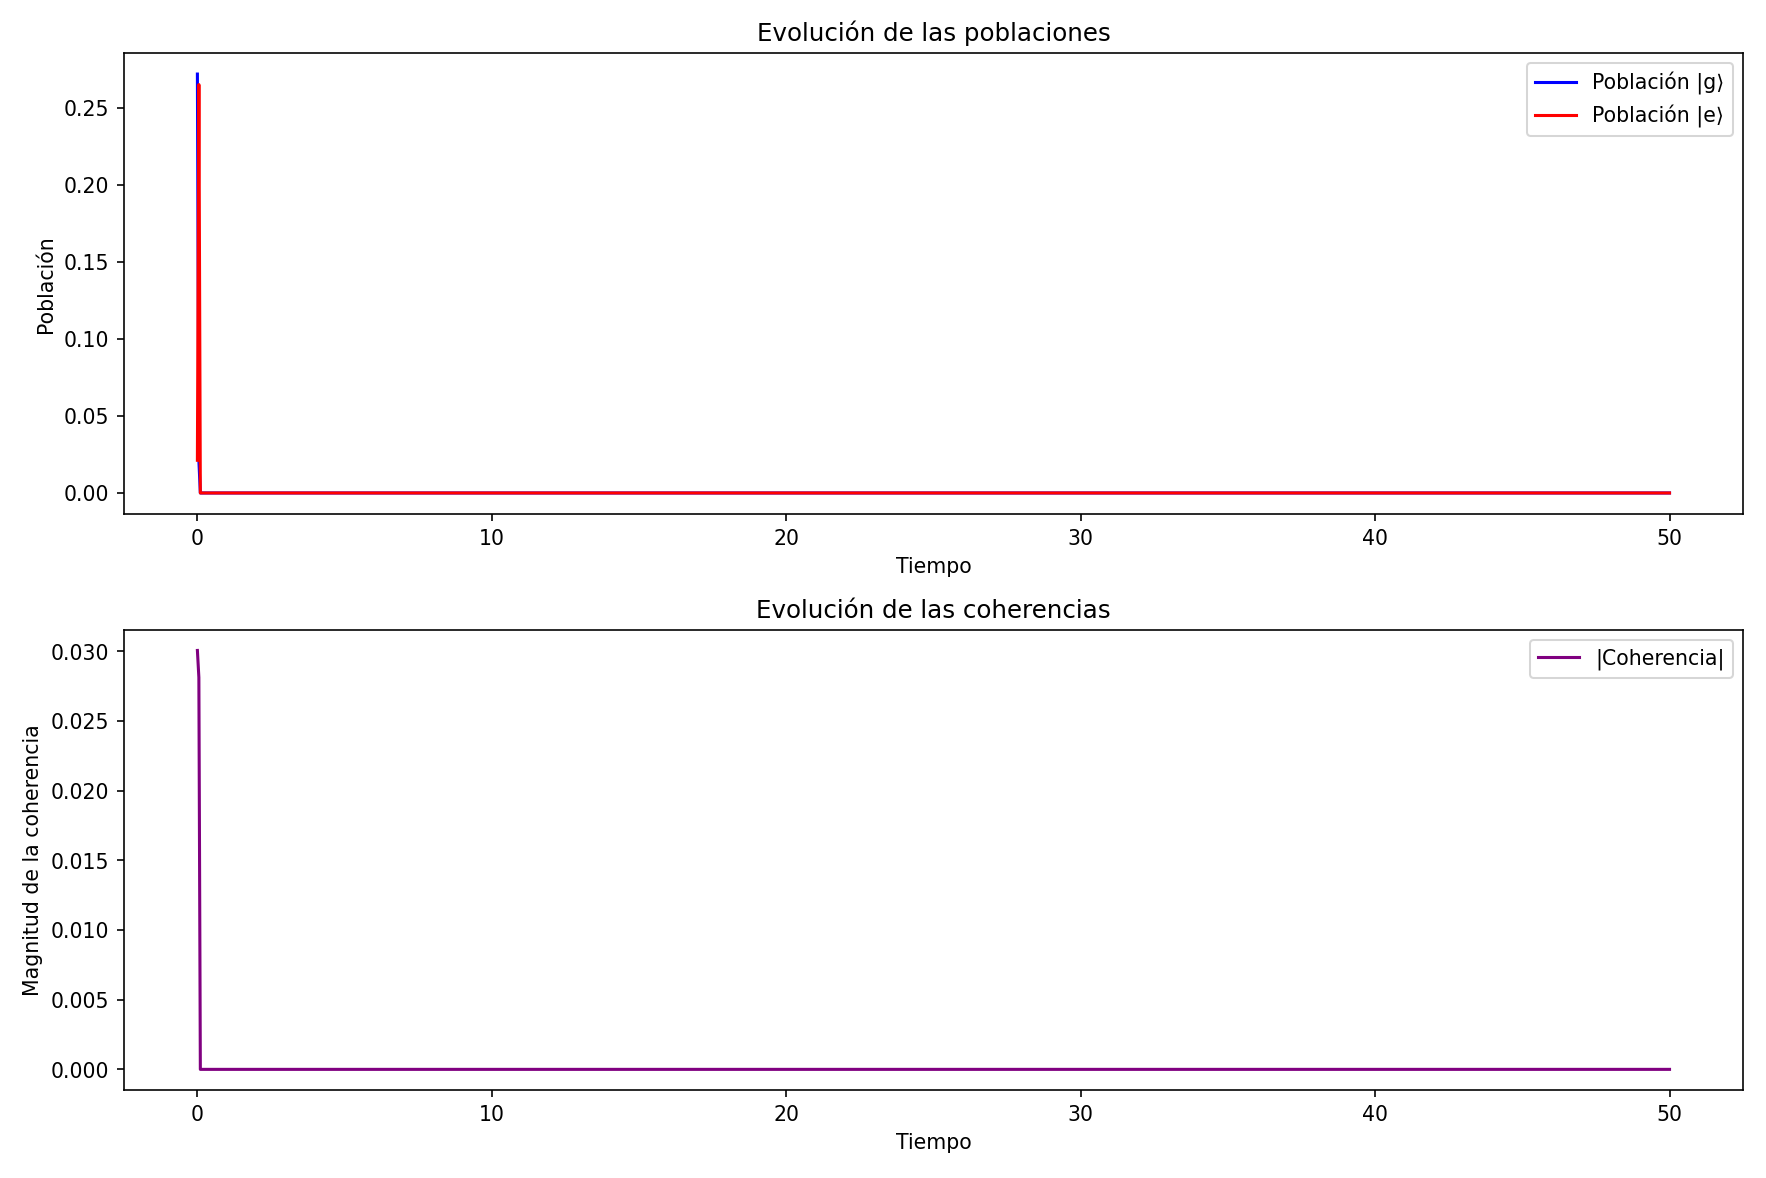

In [39]:
from qutip import basis, mcsolve, sigmax, sigmay, sigmaz, expect, Qobj
pop_g = np.zeros(len(tlist))
pop_e = np.zeros(len(tlist))
coherences = np.zeros(len(tlist), dtype=complex)
# Procesamos las trayectorias
for states in result.states:
    for idx, state in enumerate(states):
        # Convertimos el estado (array de NumPy) a Qobj
        state_qobj = Qobj(state, dims=[[2], [1]])  # Especificamos las dimensiones
        # Calculamos las probabilidades y coherencias
        pop_g[idx] += np.abs(ket_g.overlap(state_qobj))**2
        pop_e[idx] += np.abs(ket_e.overlap(state_qobj))**2
        coherences[idx] += ket_g.overlap(state_qobj) * np.conj(ket_e.overlap(state_qobj))

# Promediamos sobre las trayectorias
pop_g /= n_traj
pop_e /= n_traj
coherences /= n_traj

# Graficamos las poblaciones y coherencias
plt.figure(figsize=(12, 8))

# Poblaciones
plt.subplot(2, 1, 1)
plt.plot(tlist, pop_g, label='Población |g⟩', color='blue')
plt.plot(tlist, pop_e, label='Población |e⟩', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.title('Evolución de las poblaciones')

# Coherencias
plt.subplot(2, 1, 2)
plt.plot(tlist, np.abs(coherences), label='|Coherencia|', color='purple')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud de la coherencia')
plt.legend()
plt.title('Evolución de las coherencias')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


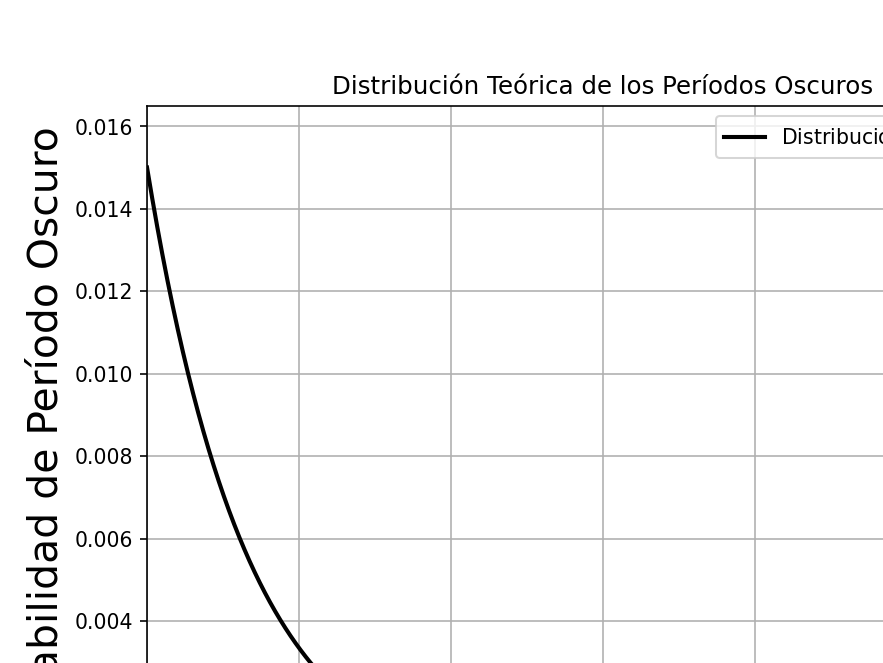

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros dados
ga = 0.015
Omega = 3.5
Delta = 0
gd = 0.05
g = 0.95

# Cálculo de la duración promedio teórica del período oscuro
Toc = 1 / ga

# Rango de tiempo para la gráfica
tlis = np.linspace(0, 800, 950)  # Cambia el rango si deseas extender el tiempo

# Distribución teórica de períodos oscuros
POc = (1 / Toc) * np.exp(-tlis / Toc)

# Graficar la distribución teórica
plt.figure(figsize=(8,6))
plt.plot(tlis, POc, color="black", linewidth=2, label='Distribución Teórica $P_O(t)$')
plt.xlabel(r'$\gamma t$', fontsize=20)
plt.ylabel('Probabilidad de Período Oscuro', fontsize=20)
plt.xlim(0, 600)
plt.ylim(0, max(POc) * 1.1)
plt.legend()
plt.grid(True)
plt.title("Distribución Teórica de los Períodos Oscuros")
plt.show()

